<a href="https://colab.research.google.com/github/Devsah9051/IRIS-PREDICTION-USING-SVM-AND-HYPERPARAMETER-TUNNING-/blob/main/IRIS_PREDICTION_USING_HYPERPERAMETER_TUNNING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#Importing the important libraries to excess the dataset :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Here we load the dataset from seaborn :
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
#printing the shape of dataset :
print("The shape of dataset is:",df.shape)

The shape of dataset is: (150, 5)


In [47]:
#Checking the unique value of species:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [48]:
#Here getting the mathematical calculation of dataset:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
#Checking the null values:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [50]:
# Getting the information about dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [51]:
# Checkling all columns of dataset :
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<Axes: xlabel='count', ylabel='species'>

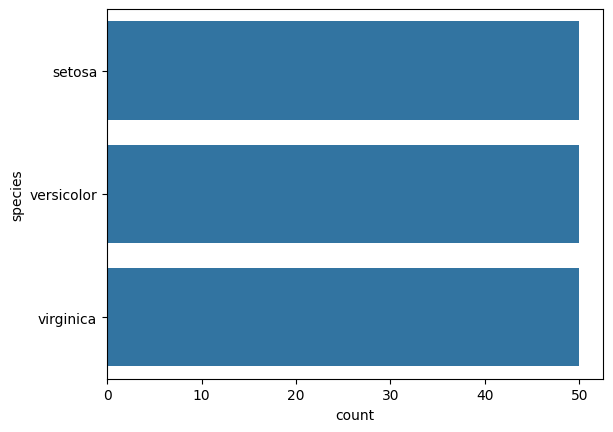

In [52]:
#Checking the different value in column species:
sns.countplot(df['species'])

In [53]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


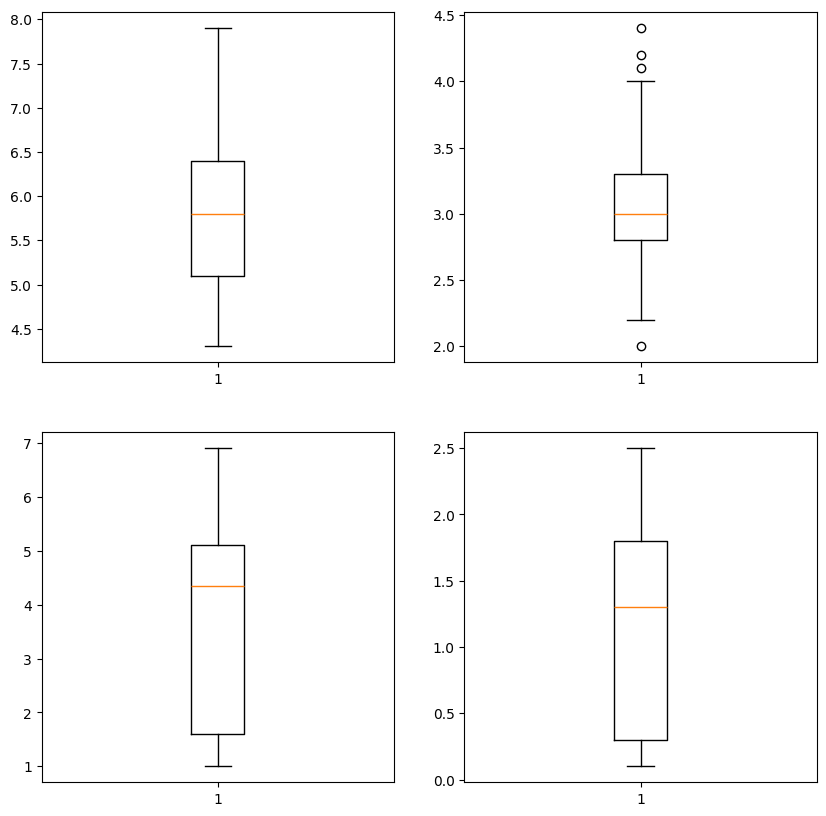

In [54]:
# plotting the graph to find the outlier in dataset :
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.boxplot(df['sepal_length'])
plt.subplot(2,2,2)
plt.boxplot(df['sepal_width'])
plt.subplot(2,2,3)
plt.boxplot(df['petal_length'])
plt.subplot(2,2,4)
plt.boxplot(df['petal_width'])
plt.show()

In [55]:
# Find the IQR:
Q1=df['sepal_width'].quantile(0.25)
Q3=df['sepal_width'].quantile(0.75)

iqr=Q3-Q1
print("This the IQR of this iris dataset :",iqr)

upper=Q3+1.5*iqr
lower=Q1-1.5*iqr
print("This is the upper bound of this iris dataset :",upper)
print("This is the lower bound of this iris dataset :",lower)

#Capping the outliers:
df['sepal_width']=np.where(df['sepal_width']>=upper,upper,np.where(df['sepal_width']<=lower,lower,df['sepal_width']))

This the IQR of this iris dataset : 0.5
This is the upper bound of this iris dataset : 4.05
This is the lower bound of this iris dataset : 2.05


<Axes: ylabel='sepal_width'>

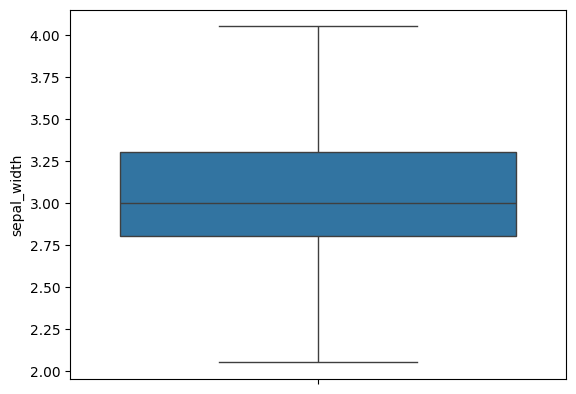

In [56]:
#Checking the dataset after the outlier detection :
sns.boxplot(df['sepal_width'])

In [57]:
#split the dataset :
x=df.drop('species',axis=1)
y=df['species']

In [58]:
#Spliting the dataset into test,train split:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
#Scaling the dataset :
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [60]:
# Using the model svm here:
from sklearn.svm import SVC
model=SVC(gamma='auto',C=30,kernel='rbf')
model=model.fit(x_train,y_train)

In [61]:
print(model)

SVC(C=30, gamma='auto')


In [62]:
# Model Evaluation :
model.score(x_train,y_train)

0.9916666666666667

In [63]:
#USing Hyperparameter Tunning by using GridSearch CV:
from sklearn.model_selection import GridSearchCV
classifier=GridSearchCV((model),{
    'C':[10,20,30],
    'kernel':['rbf','linear']},
  cv=5,return_train_score=False)

classifier.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(C=30, gamma='auto'),
             param_grid={'C': [10, 20, 30], 'kernel': ['rbf', 'linear']})

In [64]:
#CV result come out be :
classifier.cv_results_
results=pd.DataFrame(classifier.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002282,0.000396,0.001717,0.000549,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.958333,1.000000,0.833333,1.000000,0.958333,0.950000,0.061237,2
1,0.001996,0.000198,0.001338,0.000153,10,linear,"{'C': 10, 'kernel': 'linear'}",0.958333,1.000000,0.833333,1.000000,1.000000,0.958333,0.064550,1
2,0.002555,0.000378,0.002034,0.000430,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.958333,0.958333,0.833333,1.000000,1.000000,0.950000,0.061237,2
3,0.002418,0.000456,0.001681,0.000342,20,linear,"{'C': 20, 'kernel': 'linear'}",0.958333,0.958333,0.833333,0.958333,1.000000,0.941667,0.056519,5
4,0.001992,0.000325,0.001310,0.000175,30,rbf,"{'C': 30, 'kernel': 'rbf'}",0.958333,0.958333,0.833333,1.000000,1.000000,0.950000,0.061237,2
5,0.001650,0.000056,0.001251,0.000123,30,linear,"{'C': 30, 'kernel': 'linear'}",0.958333,0.958333,0.833333,0.958333,1.000000,0.941667,0.056519,5


In [65]:
results[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,0.950000
1,10,linear,0.958333
2,20,rbf,0.950000
3,20,linear,0.941667
4,30,rbf,0.950000
5,30,linear,0.941667


In [66]:
# Showing the score of this model after hyperparameter tunning
print('The best score of GridsearchCV:',classifier.best_score_)
print('The best param of GridSearchCV:',classifier.best_params_)

The best score of GridsearchCV: 0.9583333333333334
The best param of GridSearchCV: {'C': 10, 'kernel': 'linear'}


In [67]:
# saving the file here:
import joblib
joblib.dump(model,'iris_model.pkl')
joblib.dump(sc,'iris_scaler.pkl')
joblib.dump(classifier,'iris_gridsearch.pkl')

['iris_gridsearch.pkl']